In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [131]:
df = pd.read_csv("DataSet/Electric_Production.csv")
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [132]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [133]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [134]:
df.shape

(397, 2)

In [135]:
df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

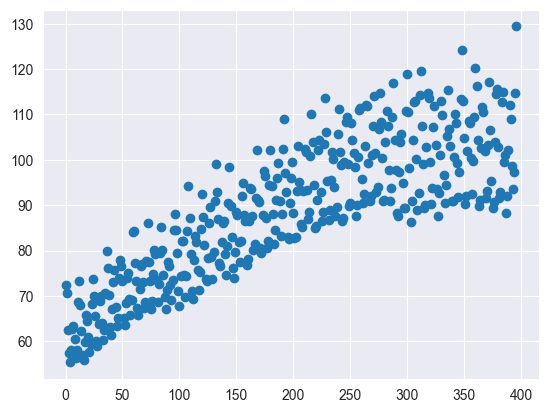

In [136]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(7,4))
plt.scatter(df.index, df.IPG2211A2N)

<Axes: ylabel='IPG2211A2N'>

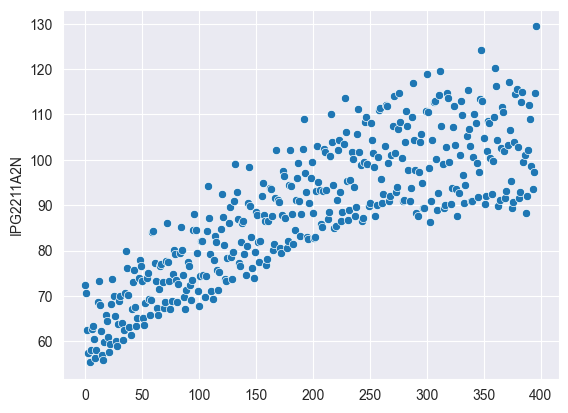

In [137]:
# plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x=df.index, y="IPG2211A2N")

<h3>Linear Regression</h3>

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
x = df.index
x[:5]

RangeIndex(start=0, stop=5, step=1)

In [140]:
x = df.index.values.reshape(-1, 1)
x[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]], dtype=int64)

In [141]:
y = df.IPG2211A2N

In [142]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

<h3>Model Evaluation</h3>

In [143]:
model.score(x, y)

0.6945572031104741

In [144]:
y_predict = model.predict(x)

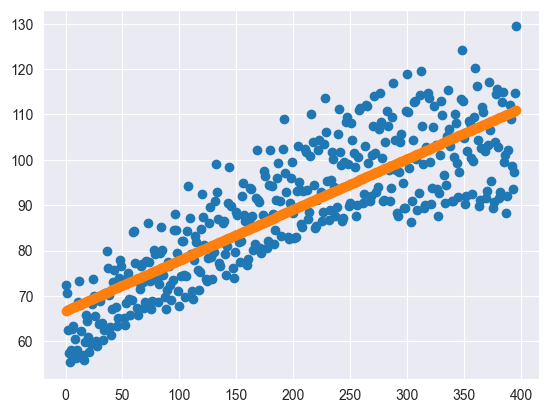

In [145]:
plt.scatter(x, y)
plt.scatter(x, y_predict)

In [146]:
mae = mean_absolute_error(y, y_predict)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mean_squared_error(y, y_predict))
r2 = r2_score(y, y_predict)
print("MAE = {}, MSE = {}, RMSE = {:.4f}, r2 = {:.4f}".format(mae, mse, rmse, r2))

MAE = 7.061649548012292, MSE = 72.14222510599647, RMSE = 8.4937, r2 = 0.6946


<h3>Prediction</h3>

In [147]:
y_predict = model.predict([[8/1/1985]])
y_predict[0]

66.7192423920182

In [148]:
x_inpt = [8/1/1985, 9/1/2003, 5/1/2004, 1/1/2018]
x_inpt = np.array(x_inpt).reshape(-1, 1)

y_predict = model.predict(x_inpt)
print(y_predict)

[66.71924239 66.71929414 66.71907082 66.71884736]


<h3>Polynomial Regression</h3>

In [149]:
from sklearn.preprocessing import PolynomialFeatures

In [150]:
x = df.index
x = df.index.values.reshape(-1, 1)
x[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]], dtype=int64)

In [151]:
y = df.IPG2211A2N

In [152]:
poly_feat = PolynomialFeatures(degree=3)
x_poly = poly_feat.fit_transform(x)

In [153]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

<h3>Model Evaluate</h3>

In [154]:
model.score(x_poly, y)

0.7386424793283592

In [155]:
y_pred_poly = model.predict(x_poly)

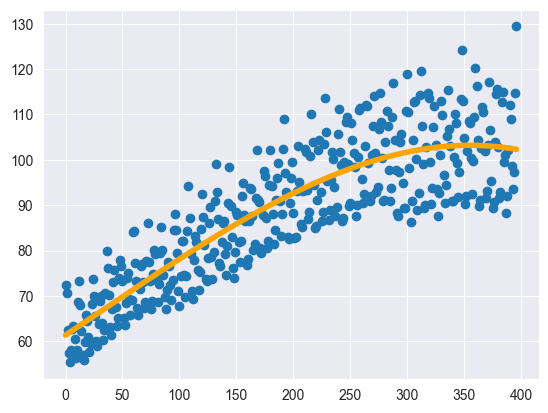

In [156]:
plt.scatter(x, y)
plt.plot(x, y_pred_poly, color="orange", linewidth="4")

In [157]:
mae = mean_absolute_error(y, y_pred_poly)
mse = mean_squared_error(y, y_pred_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred_poly))
r2 = r2_score(y, y_pred_poly)
print("MAE = {}, MSE = {}, RMSE = {:.4f}, r2 = {:.4f}".format(mae, mse, rmse, r2))

MAE = 6.565620318055806, MSE = 61.72976832797327, RMSE = 7.8568, r2 = 0.7386


<h3>Prediction</h3>

In [161]:
x_inpt = [8/1/1985, 9/1/2003, 5/1/2004, 1/1/2018]
x_inpt = np.array(x_inpt).reshape(-1, 1)

poly_feat = PolynomialFeatures(degree=3)

x_inpt_poly = poly_feat.fit_transform(x_inpt)

y_predict_pl_prd = model.predict(x_inpt_poly)
print(y_predict_pl_prd)

[61.33481795 61.33489596 61.33455932 61.33422248]
